Đọc thư viện

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

Lưu dữ liệu vào biến data_read

In [2]:
data_read = pd.read_csv('iris.csv')

Khảo sát về mặt thống kê

In [18]:
data_read.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Xem một vài dữ liệu đầu, từ đó biết được các features và labels

In [19]:
data_read.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Xem số lượng và tên gọi các class

In [20]:
class_names = data_read['variety'].unique()
print(class_names)

['Setosa' 'Versicolor' 'Virginica']


Chuyển sang dạng numpy

In [21]:
data = data_read.to_numpy()

Vẽ đồ thị 2 scatter nằm trong một hình như trên:
+ Đồ thị thứ nhất biểu diễn mqh giữa chiều rộng đài hoa và chiều rộng cánh hoa của Setosa và Virginica có phân loại màu bằng lengend().
+ Đồ thị thứ hai biểu diễn mqh giữa chiều dài đài hoa và chiều dài cánh hoa của Setosa và Virginica có phân loại màu bằng lengend().

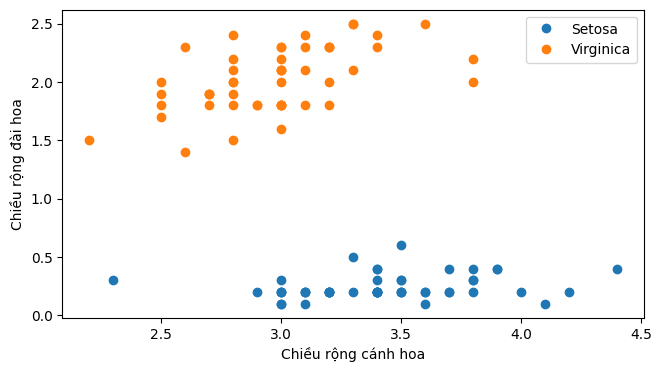

In [39]:
#tạo ra một cửa sổ kích thước 15x4 inchs, gồm 1 hàng và 2 cột, mỗi cột chứa một subplot
hinh, truc = plt.subplots(figsize = [7.5, 4])
#ĐỒ THỊ PLOT THỨ NHẤT (BÊN TRÁI)

truc.plot(data[(data[:,4]=='Setosa'),1], data[(data[:,4]=='Setosa'),3], 'o', label='Setosa')
#lọc hàng là dữ liệu của loài hoa Setosa, cột là dữ liệu của chiều rộng cánh hoa (sepal width)
#lọc hàng là dữ liệu của loài hoa Setosa, cột là dữ liệu của chiều rộng đài hoa (petal width)

truc.plot(data[(data[:,4]=='Virginica'),1], data[(data[:,4]=='Virginica'),3], 'o', label='Virginica')
#lọc hàng là dữ liệu của loài hoa Virginica, cột là dữ liệu của chiều rộng cánh hoa (sepal width)
#lọc hàng là dữ liệu của loài hoa Virginica, cột là dữ liệu của chiều rộng đài hoa (petal width)

# x2 = data[(data[:,4]=='Virginica'),0]
# y2 = data[(data[:,4]=='Virginica'),2]
# toado_Virginica_width= list(zip(x2, y2))
# print(toado_Virginica_width)

truc.set_xlabel("Chiều rộng cánh hoa")
truc.set_ylabel("Chiều rộng đài hoa")
truc.legend()
plt.show()

Hàm tính khoảng cách của 2 điểm

In [31]:
def distance(point_1,point_2):
    l = len(point_1)
    sum = 0
    for i in range(l):
        sum = sum + (point_1[i]-point_2[i])**2
        dist = np.sqrt(sum)
    return dist

Thuật toán K_NN

In [36]:
def knn(X, x_new, K):
    rows, cols  = X.shape
    class_names = np.unique(X[:,cols-1])
    dis_list = np.zeros(rows) # tạo mảng 1 chiều dis_list có các hàng đều mang giá trị 0 để lưu giá trị khoảng cách
    
    for i in range(rows):                               # Duyệt tất cả các dữ liệu.
        dis_list[i] = distance(X[i,:cols-1], x_new)     # Tính toán khoảng cách từ điểm mới đưa vào tới các điểm trong bộ dữ liệu

    index = dis_list.argsort()[:K]          # Tìm vị trí của K điểm gần nhất
    
    # Kiểm tra xem trong K điểm gần nhất, lớp nào xuất hiện nhiều nhất
    voting = np.zeros(class_names.shape)
    for i in index:
        id = np.where(data[i,cols-1]==class_names)
        voting[id] = voting[id]+1
    
    
    # Trả về kết quả là lớp xuất hiện nhiều nhất
    class_name = class_names[np.argmax(voting)]    
    return class_name

In [47]:
X = data_read.copy()                     # copy tập data lưu vào biến X
X.drop(columns=['sepal.length', 'petal.length'], inplace=True)
X1 = X.to_numpy()
x_new = np.array([2.5,0.7]) # Chọn 1 bộ giá chiều rộng đài hoa và cánh hoa bất kỳ
#Tiến hành tính khoảng cách bằng hàm knn và cũng trong hàm này, đưa ra 3 điểm dữ liệu (K = 3) gần với điểm dữ liệu x_new nhất, sau đó xem coi class nào có 2 cái thì return class đó.

In [50]:
d = knn(X1,x_new,5)
print (d)

Setosa


Plot lại điểm x_new

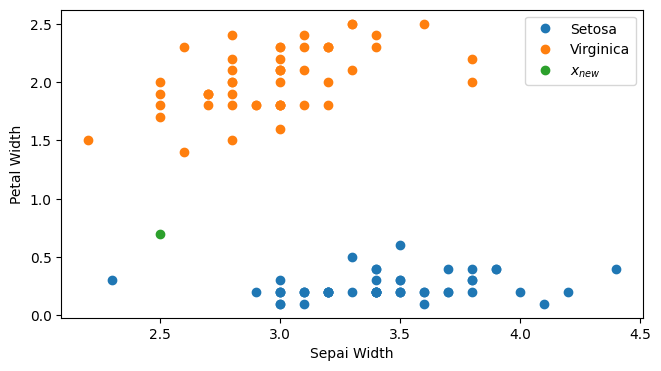

In [56]:
hinh, truc1 = plt.subplots(figsize = [7.5, 4])
# Vẽ các nhóm theo sepai.width và petal.width
truc1.plot(data[(data[:,4]=='Setosa'),1], data[(data[:,4]=='Setosa'),3],'o', label= 'Setosa')
truc1.plot(data[(data[:,4]=='Virginica'),1], data[(data[:,4]=='Virginica'),3],'o', label= 'Virginica')

truc1.plot(x_new[0], x_new[1], 'o', label = '$x_{new}$')
truc1.set_xlabel("Sepai Width")
truc1.set_ylabel("Petal Width")
truc1.legend()

plt.show()